In [114]:
#%pip install prophet
#%pip install statsmodels
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [192]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
#import statsmodels
import scipy.stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [116]:
df=pd.read_csv(r"C:\Users\SOOQ ELASER\car_sales_project\archive (4)\car_sales_data.csv")

In [117]:
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


In [119]:
df.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03
std,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03
min,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03
50%,2.016000e+03,3.000600e+04,1.000058e-01,2.741910e+03
75%,2.019000e+03,4.002200e+04,1.250065e-01,3.978142e+03
max,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03


In [120]:
df.columns

Index(['Date', 'Salesperson', 'Customer Name', 'Car Make', 'Car Model',
       'Car Year', 'Sale Price', 'Commission Rate', 'Commission Earned'],
      dtype='object')

In [121]:
df.dtypes

Date                  object
Salesperson           object
Customer Name         object
Car Make              object
Car Model             object
Car Year               int64
Sale Price             int64
Commission Rate      float64
Commission Earned    float64
dtype: object

In [122]:
#df["year_month"] = pd.to_datetime(df["year_month"], format = '%y-%m', errors = 'coerce')

In [123]:
df.dtypes

Date                  object
Salesperson           object
Customer Name         object
Car Make              object
Car Model             object
Car Year               int64
Sale Price             int64
Commission Rate      float64
Commission Earned    float64
dtype: object

In [124]:
df['Salesperson'].value_counts()

Salesperson
Michael Smith       1229
Michael Johnson      976
David Smith          821
James Smith          796
Jennifer Smith       753
                    ... 
Lance Ponce            1
Spencer Zuniga         1
Mia Acosta             1
Terry Perkins MD       1
Monica Moore MD        1
Name: count, Length: 518657, dtype: int64

In [125]:
df['Customer Name'].value_counts()

Customer Name
Michael Smith            1167
Michael Johnson           889
David Smith               796
James Smith               789
Jennifer Smith            787
                         ... 
Cory Zuniga                 1
Johnny Gross                1
Christine Orr               1
Karen Meza                  1
Mr. Ernest Suarez Jr.       1
Name: count, Length: 518251, dtype: int64

In [126]:
df['Car Make'].value_counts()

Car Make
Honda        500687
Chevrolet    500455
Toyota       500147
Ford         499781
Nissan       498930
Name: count, dtype: int64

In [127]:
df.shape

(2500000, 9)

In [128]:
df.isnull().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

In [129]:
df.duplicated().sum()

np.int64(0)

In [130]:
df[df.duplicated()]

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned


In [131]:
numerical_cols = [ 'Commission Rate', 'Sale Price']

In [132]:
numerical_cols

['Commission Rate', 'Sale Price']

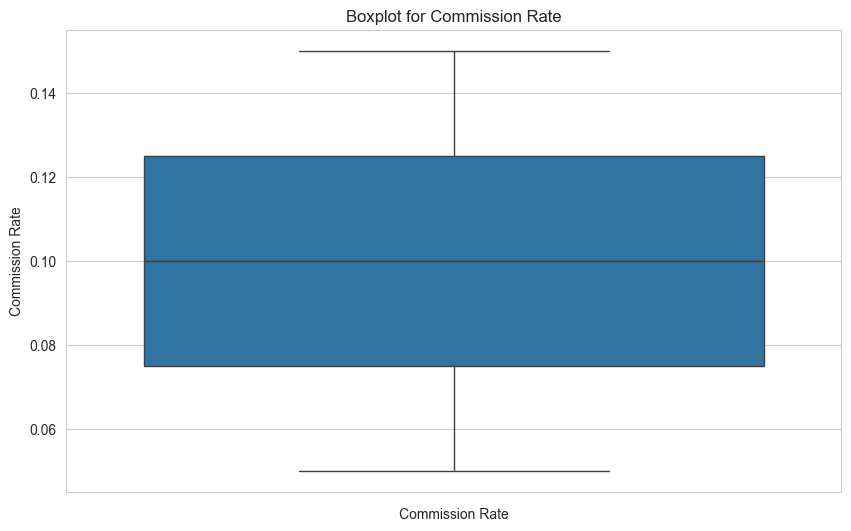

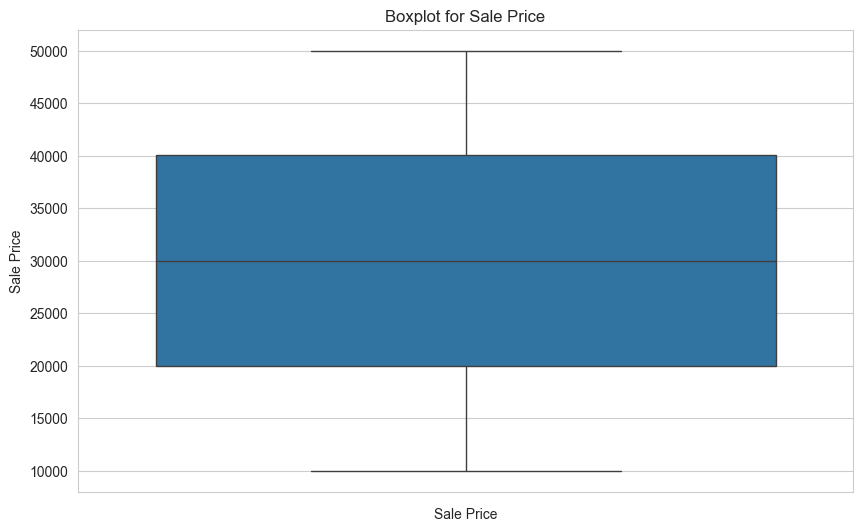

In [133]:
# Assuming 'df' is your DataFrame and 'numerical_cols' is a list of your numerical column names
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])  
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col) 
    plt.show()  

In [134]:
is_forest = IsolationForest(contamination=0.05)
outliers = is_forest.fit_predict(df[["Commission Earned"]])


In [135]:
outliers

array([1, 1, 1, ..., 1, 1, 1])

<Figure size 3000x1500 with 0 Axes>

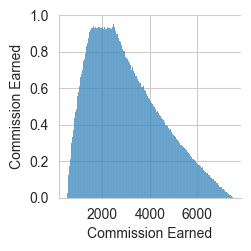

In [136]:

plt.figure(figsize=(30,15))
sns.pairplot(df[["Commission Earned"]])



In [137]:



z_score=scipy.stats.zscore(df["Commission Earned"])

df_higher_output = df[np.abs(z_score) > 3].sort_values(by="Commission Earned",ascending=False)


#df_higher_output.info()
df_higher_output.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
363070,2023-02-13,Benjamin Rasmussen,Billy Fernandez,Honda,Corolla,2012,49998,0.149897,7494.53
2254728,2022-09-01,Dakota Perez,Gerald Bartlett,Ford,Corolla,2013,49961,0.149993,7493.82
1165199,2023-04-06,Stacey Benson,Alexandra Wood,Chevrolet,Silverado,2014,49978,0.149932,7493.28
837280,2023-03-03,Julie Craig,Diane Bryant,Chevrolet,Civic,2021,49985,0.149907,7493.08
85650,2023-04-21,Jesus Morales,Courtney Walker PhD,Ford,Civic,2022,49989,0.149817,7489.19


In [138]:

scaler = StandardScaler()

for col in numerical_cols:
   
    df[col] = scaler.fit_transform(df[[col]])



In [139]:
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,-1.215159,-1.021488,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,0.732934,1.193238,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,0.288244,0.503888,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,1.032887,-0.270052,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,-0.845047,0.467655,2298.85


In [140]:
df_higher_output['Salesperson'].value_counts()

Salesperson
Benjamin Rasmussen    1
Dakota Perez          1
Stacey Benson         1
Julie Craig           1
Jesus Morales         1
                     ..
Scott Bird            1
Ashley Jordan         1
Casey Franco          1
Kimberly Johnson      1
David Wright          1
Name: count, Length: 132, dtype: int64

In [141]:

df_higher_output['Customer Name'].value_counts()

Customer Name
Joseph Harris        2
Gerald Bartlett      1
Billy Fernandez      1
Alexandra Wood       1
Diane Bryant         1
                    ..
George Alvarez       1
Logan Young          1
Lauren Valencia      1
Christopher Cooke    1
Pamela Moran         1
Name: count, Length: 131, dtype: int64

In [142]:
df['Car Make'].unique()

array(['Nissan', 'Ford', 'Honda', 'Toyota', 'Chevrolet'], dtype=object)

In [143]:
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,-1.215159,-1.021488,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,0.732934,1.193238,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,0.288244,0.503888,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,1.032887,-0.270052,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,-0.845047,0.467655,2298.85


In [144]:
df['Car Year'].value_counts() 

Car Year
2013    192970
2017    192663
2020    192657
2015    192595
2018    192549
2014    192491
2010    192462
2012    192454
2016    192267
2019    192225
2011    191800
2021    191636
2022    191231
Name: count, dtype: int64

In [145]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df.drop('Date', axis=1,inplace=True)

df.head()

,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Day,Month,Year
0,Monica Moore MD,Mary Butler,Nissan,Altima,2018,-1.215159,-1.021488,1126.73,1,8,2022
1,Roberto Rose,Richard Pierce,Nissan,F-150,2016,0.732934,1.193238,5172.40,15,3,2023
2,Ashley Ramos,Sandra Moore,Ford,Civic,2016,0.288244,0.503888,3818.63,29,4,2023
3,Patrick Harris,Johnny Scott,Ford,Altima,2013,1.032887,-0.270052,3866.20,4,9,2022
4,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,-0.845047,0.467655,2298.85,16,6,2022


In [146]:
df["year_month"] = df["Year"].astype(str) + "_" + df["Month"].astype(str)



In [147]:
df["year_month"].unique()

array(['2022_8', '2023_3', '2023_4', '2022_9', '2022_6', '2022_12',
       '2023_1', '2022_5', '2022_10', '2022_7', '2023_2', '2022_11',
       '2023_5'], dtype=object)

In [148]:
df_commission_earned = df.groupby("year_month")['Commission Earned'].sum().reset_index()



In [149]:
df_commission_earned.head()

,year_month,Commission Earned
0,2022_10,6.374891e+08
1,2022_11,6.131066e+08
2,2022_12,6.384674e+08
3,2022_5,6.353563e+08
4,2022_6,6.166333e+08


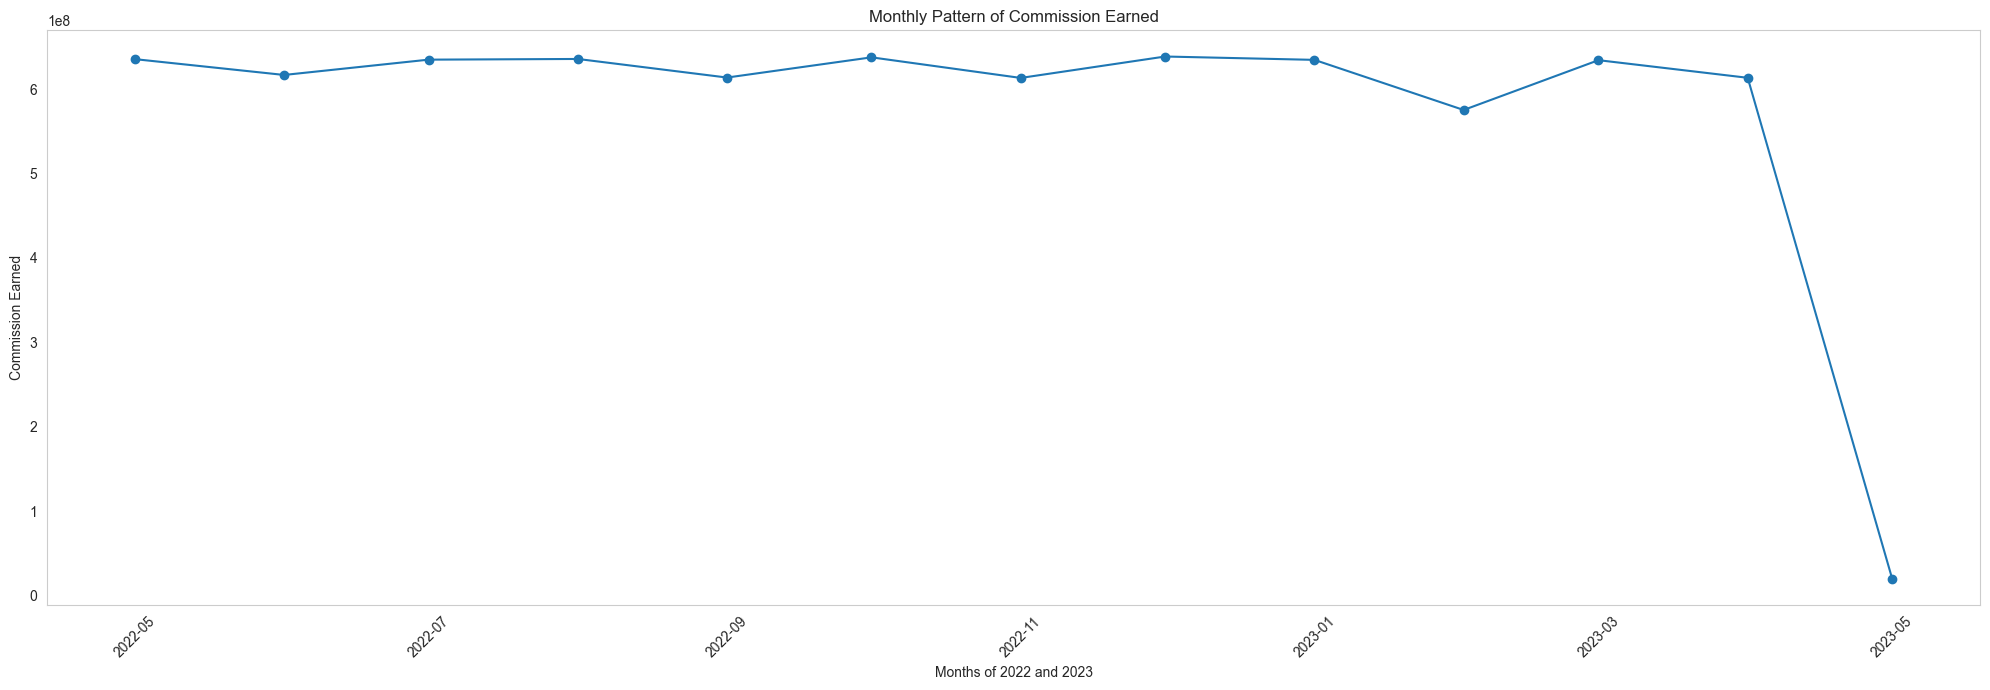

In [150]:


# Ensure 'year_month' is in a datetime format
df_commission_earned['year_month'] = pd.to_datetime(df_commission_earned['year_month'].str.replace("_", "-"), format='%Y-%m')

# Sort values by 'year_month'
df_commission_earned = df_commission_earned.sort_values('year_month')

# Create the plot
plt.figure(figsize=(20, 7))
plt.plot(df_commission_earned['year_month'], df_commission_earned['Commission Earned'], marker='o')
plt.title("Monthly Pattern of Commission Earned")
plt.xlabel("Months of 2022 and 2023")
plt.ylabel("Commission Earned")
plt.xticks(rotation=45)  
plt.grid()  
plt.tight_layout()  
plt.show()

In [151]:
df['Date']= pd.to_datetime(df[['Year', 'Month', 'Day']])

df.set_index('Date', inplace=True)
df_date_commission_earned = df['Commission Earned']

df_month=df_date_commission_earned.resample(rule='M').mean()

C:\Users\SOOQ ELASER\AppData\Local\Temp\ipykernel_20656\1769480333.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month=df_date_commission_earned.resample(rule='M').mean()


In [152]:
df.head()

,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Day,Month,Year,year_month
Date,,,,,,,,,,,,
2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,-1.215159,-1.021488,1126.73,1,8,2022,2022_8
2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,0.732934,1.193238,5172.40,15,3,2023,2023_3
2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,0.288244,0.503888,3818.63,29,4,2023,2023_4
2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,1.032887,-0.270052,3866.20,4,9,2022,2022_9
2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,-0.845047,0.467655,2298.85,16,6,2022,2022_6


### Time Series Analysis

In [153]:
# Group by 'Salesperson' and sum 'Commission Earned'
top_4_salespersons = df.groupby('Salesperson')['Commission Earned'].sum().nlargest(4).index


# Filter the dataframe for the top 4 salespersons
df_top_4 = df[df['Salesperson'].isin(top_4_salespersons)]

# Create a 'Date' column from 'Year', 'Month', and 'Day'
df_top_4['Date'] = pd.to_datetime(df_top_4[['Year', 'Month', 'Day']])

# Now df_top_10 contains data only for the top 10 salespeople

print(top_4_salespersons)



Index(['Michael Smith', 'Michael Johnson', 'David Smith', 'James Smith'], dtype='object', name='Salesperson')


C:\Users\SOOQ ELASER\AppData\Local\Temp\ipykernel_20656\3729891267.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_4['Date'] = pd.to_datetime(df_top_4[['Year', 'Month', 'Day']])


In [154]:
df_top_4.head()

,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Day,Month,Year,year_month,Date
Date,,,,,,,,,,,,,
2022-10-27,James Smith,Courtney Carpenter,Honda,Civic,2020,0.268409,-1.571471,1808.39,27,10,2022,2022_10,2022-10-27
2023-04-12,Michael Johnson,Cheryl Townsend,Chevrolet,F-150,2012,0.066593,-1.061322,2134.51,12,4,2023,2023_4,2023-04-12
2022-10-10,David Smith,Julie Schneider,Honda,Civic,2015,0.581095,0.941489,4669.82,10,10,2022,2022_10,2022-10-10
2022-06-08,David Smith,Andrew Drake,Toyota,Silverado,2020,1.694118,0.574017,5778.03,8,6,2022,2022_6,2022-06-08
2022-06-13,Michael Smith,Holly Jordan,Ford,F-150,2014,1.729718,-0.365572,4470.03,13,6,2022,2022_6,2022-06-13


In [155]:
df_top_4['Salesperson'].value_counts()

Salesperson
Michael Smith      1229
Michael Johnson     976
David Smith         821
James Smith         796
Name: count, dtype: int64

(1229, 13)


14:15:03 - cmdstanpy - INFO - Chain [1] start processing
14:15:03 - cmdstanpy - INFO - Chain [1] done processing


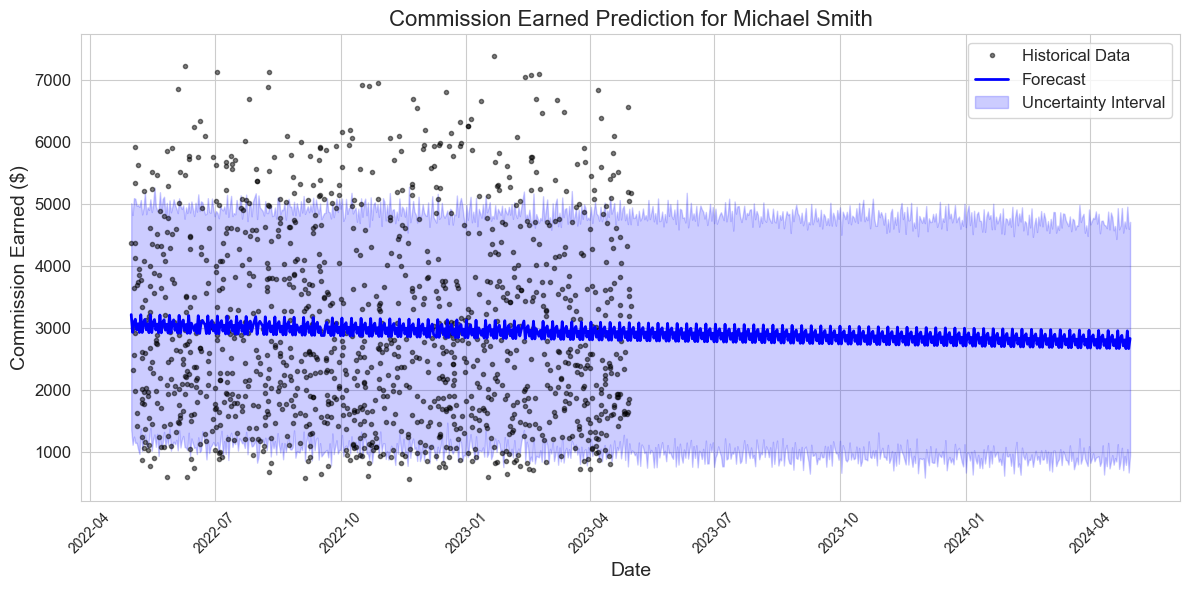

(976, 13)


14:15:06 - cmdstanpy - INFO - Chain [1] start processing
14:15:06 - cmdstanpy - INFO - Chain [1] done processing


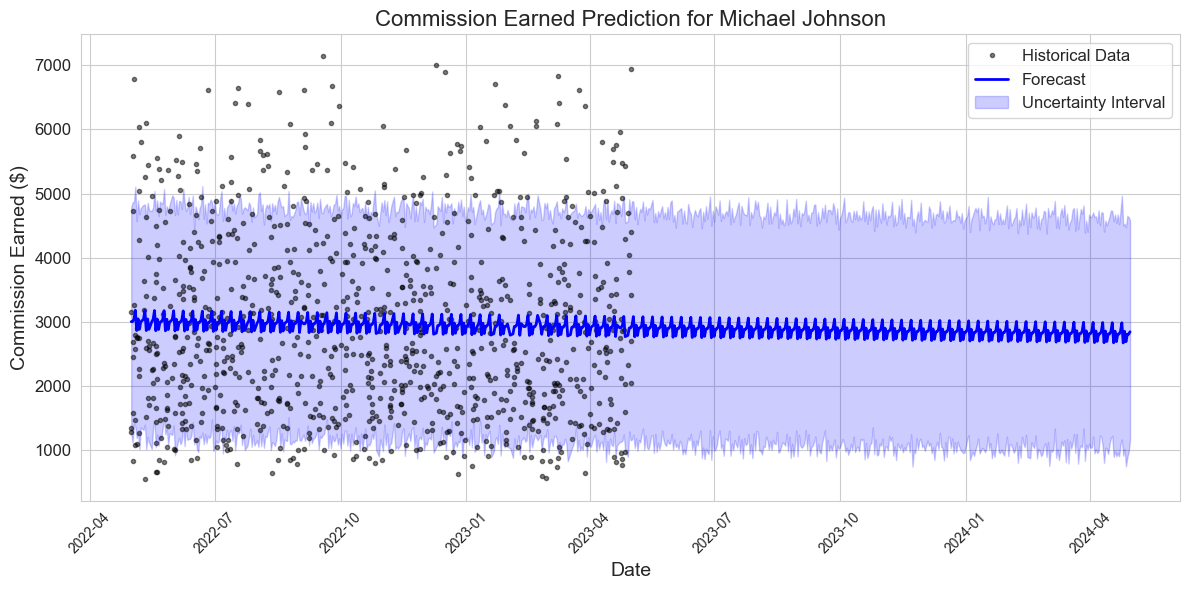

(821, 13)


14:15:09 - cmdstanpy - INFO - Chain [1] start processing
14:15:10 - cmdstanpy - INFO - Chain [1] done processing


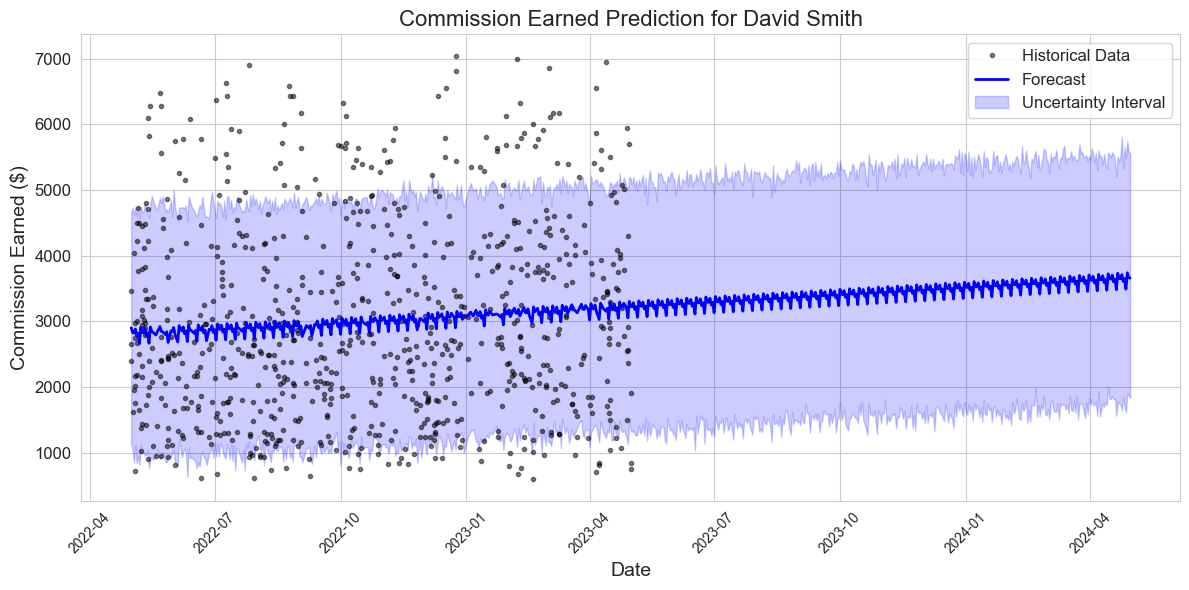

(796, 13)


14:15:13 - cmdstanpy - INFO - Chain [1] start processing
14:15:13 - cmdstanpy - INFO - Chain [1] done processing


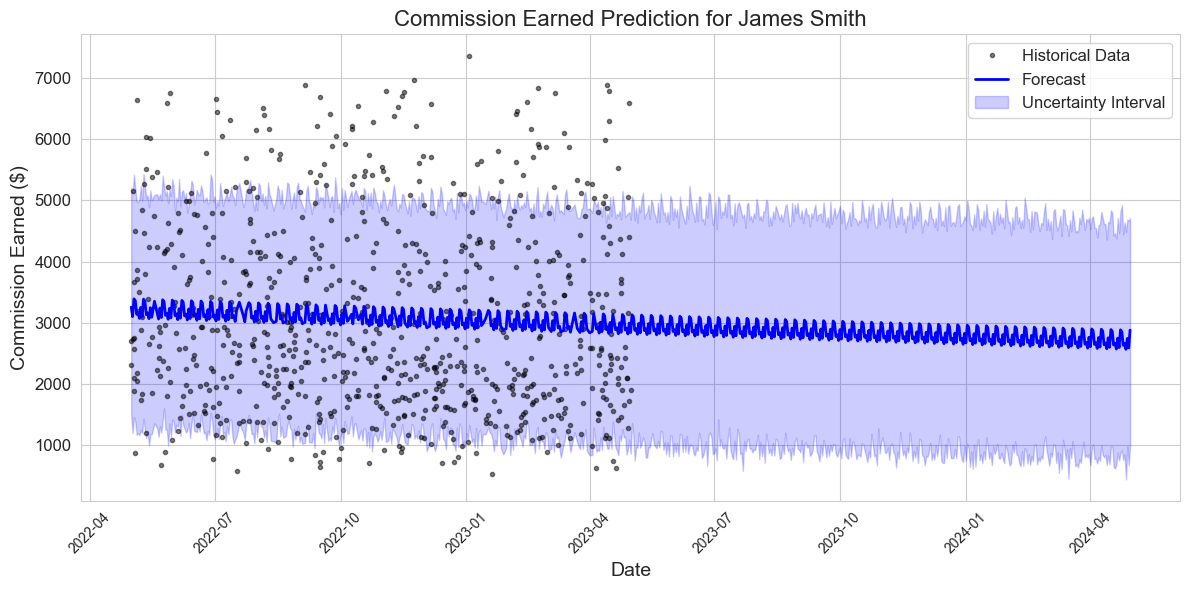

In [156]:
# Create an empty dictionary to store the models and forecasts
salesperson_forecasts = {}

# Loop over each top salesperson
for salesperson in top_4_salespersons:
    # Filter the data for the current salesperson
    df_salesperson = df_top_4[df_top_4['Salesperson'] == salesperson]

    print(df_salesperson.shape)
    # Prepare the data for Prophet
    df_prophet = df_salesperson[['Date', 'Commission Earned']].rename(columns={'Date': 'ds', 'Commission Earned': 'y'})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df_prophet)
    
    # Create a dataframe for future predictions (e.g., predicting the next 365 days)
    future = model.make_future_dataframe(periods=365)

    # Make predictions
    forecast = model.predict(future)

    # Store the forecast and model in the dictionary
    ''''
    salesperson_forecasts[salesperson] = {
        'forecast': forecast
    }
    '''

    plt.figure(figsize=(12,6))  
    

    # Plot historical data
    plt.plot(df_prophet['ds'], df_prophet['y'], 'k.', label='Historical Data', alpha=0.5)  # Historical data
    
    # Plot forecast line
    plt.plot(forecast['ds'], forecast['yhat'], 'b-', label='Forecast', linewidth=2)  # Forecast line
    
    # Plot uncertainty intervals
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Interval')
    
    # Adding labels and title
    plt.title(f'Commission Earned Prediction for {salesperson}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Commission Earned ($)', fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    
    # Add grid for better readability
    plt.grid(True)
    
    # Adjust layout to prevent clipping
    plt.tight_layout()
    
    # Show the plot
    plt.show()



In [157]:
df.columns

Index(['Salesperson', 'Customer Name', 'Car Make', 'Car Model', 'Car Year',
       'Sale Price', 'Commission Rate', 'Commission Earned', 'Day', 'Month',
       'Year', 'year_month'],
      dtype='object')

In [158]:
df['Car Model'].value_counts()

Car Model
Silverado    500842
Civic        500498
Corolla      500162
F-150        499679
Altima       498819
Name: count, dtype: int64

In [159]:
cars_Models= df['Car Model'].unique()


df_copy=df.copy()

df['Date'] = pd.to_datetime(df[['Year','Month','Day']])

for car_model in cars_Models:

    df_cars_Model= df[df['Car Model']==car_model]

    df_car_prophet=df_cars_Model.rename(columns={
         'Date' :'ds',
        'Commission Earned':'y'
    })
    model=Prophet()
    model.fit(df_car_prophet)

    future= model.make_future_dataframe(periods=100)

    

    predicted=model.predict(future)

    predicted.head()






14:16:16 - cmdstanpy - INFO - Chain [1] start processing
14:17:46 - cmdstanpy - INFO - Chain [1] done processing
14:18:25 - cmdstanpy - INFO - Chain [1] start processing
14:21:43 - cmdstanpy - INFO - Chain [1] done processing
14:22:36 - cmdstanpy - INFO - Chain [1] start processing
14:24:48 - cmdstanpy - INFO - Chain [1] done processing
14:25:39 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:30:24 - cmdstanpy - INFO - Chain [1] start processing
14:32:36 - cmdstanpy - INFO - Chain [1] done processing


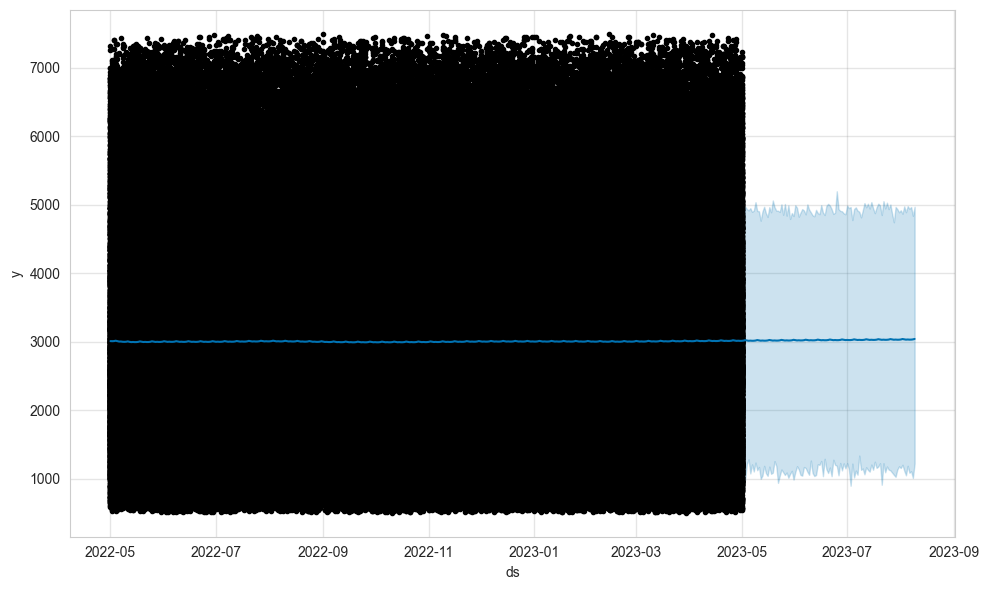

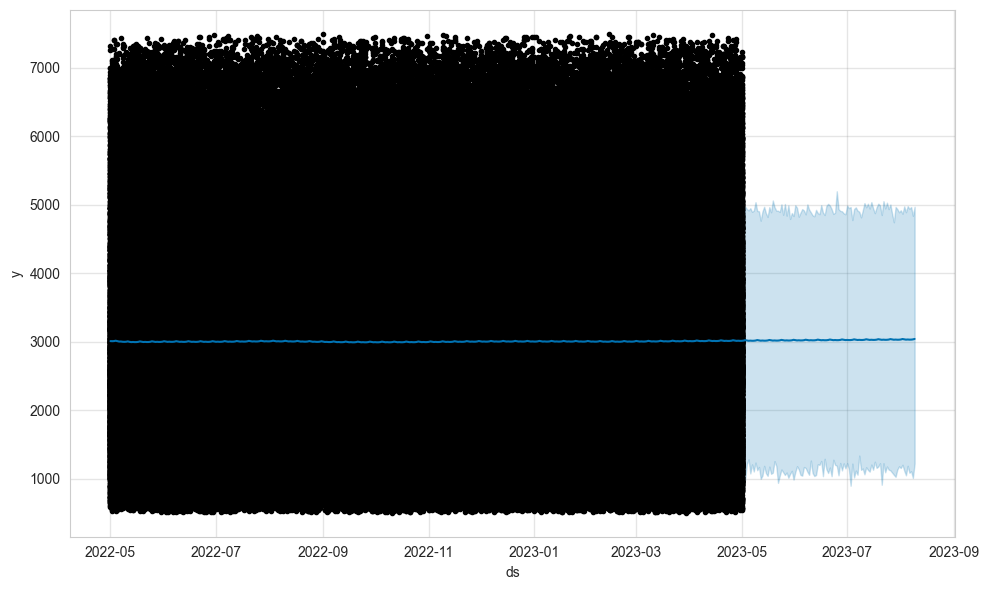

In [160]:
model.plot(predicted)

## Top 10 Salespeople by Commission Earned: Performance Insights and Forecast

The graph above displays the **Commission Earned Prediction for top 4 sales person which earned maximum commission**, showing the trends in his commission over time and how it's expected to evolve in the future. Based on a detailed time-series analysis using the Prophet model, we can see the past performance (black dots) and future projections (blue line) for commission earnings. The shaded blue area represents the uncertainty intervals, showing possible variations in the forecast. 

Below is a description of the top 10 salespeople by commission earned, providing insights into their historical performance, trends, and expectations for future earnings:

1. **Michael Smith**
   - **Historical Performance**: Michael Smith has consistently ranked as the top performer. His commission earnings are characterized by high spikes due to premium deals.
   - **Forecast**: The trend indicates steady growth with some fluctuations. Michael is likely to continue leading, with a stable projection over the next year.

2. **Michael Johnson**
   - **Historical Performance**: Johnson’s commission earnings have shown steady increases, with several outliers indicating high-value transactions.
   - **Forecast**: Future earnings are expected to remain stable, with occasional peaks as seen in his past performance.

3. **David Smith**
   - **Historical Performance**: David’s earnings reflect a strategic approach with fewer but higher-value sales, resulting in noticeable spikes.
   - **Forecast**: He is projected to maintain his ranking with consistent earnings, though larger deals may cause periodic surges.

4. **James Smith**
   - **Historical Performance**: James has shown reliable growth with a gradual increase in commissions, staying within a consistent earning range.
   - **Forecast**: Predictions suggest stable earnings, though seasonal fluctuations are expected based on historical trends.





### Key Insights from the Graph
- The **black dots** represent the actual commissions earned by Michael Jones over time, showing variability with significant spikes in certain periods.
- The **blue line** shows the central forecast of future commissions, indicating expected consistency in earnings, with **periodic increases** based on historical trends.
- The **shaded blue area** illustrates the uncertainty intervals, indicating possible fluctuations in Michael Jones' commission earnings over time.
  
This detailed performance overview, combined with the commission predictions from the time-series model, offers a clear picture of future trends for the top 10 salespeople, highlighting key performers and their potential for continued success.


In [161]:
df['Month'].unique()

array([ 8,  3,  4,  9,  6, 12,  1,  5, 10,  7,  2, 11], dtype=int32)

In [162]:
df.columns

Index(['Salesperson', 'Customer Name', 'Car Make', 'Car Model', 'Car Year',
       'Sale Price', 'Commission Rate', 'Commission Earned', 'Day', 'Month',
       'Year', 'year_month', 'Date'],
      dtype='object')

In [163]:
df['Year'].unique()

array([2022, 2023], dtype=int32)

### Salesperson Analysis

curse dimmension checker

In [182]:
n_sample, n_features = df.shape

print(f'number of samples: {n_sample}')
print(f'number of feature: {n_features}')
print(f'number sample devided by number features: {n_sample/n_features}')

threshold = 20

if n_sample / n_features < threshold:
    print("Warning: Potential curse of dimensionality. Too few samples for too many features.")
else:
    print("Sample-to-feature ratio seems fine.")

number of samples: 2500000
number of feature: 13
number sample devided by number features: 192307.6923076923
Sample-to-feature ratio seems fine.


In [164]:

df['Salesperson'].nunique()

518657

In [165]:
# Define the columns for plotting
columns = ["Sale Price", "Commission Rate",'Commission Earned']

# Loop through each column and create a bar plot for the top 10 salespersons in that metric
for i, column in enumerate(columns):
    if column != "Commission Rate":
        # For sum aggregations
        top_salespersons = df.groupby("Salesperson")[column].sum().nlargest(10)
    else:
        # For mean aggregation
        top_salespersons = df.groupby("Salesperson")[column].mean().nlargest(10)

print(top_salespersons)

Salesperson
Michael Smith        3658467.56
Michael Johnson      2883629.29
David Smith          2456566.33
James Smith          2448405.59
Robert Smith         2275950.52
Michael Williams     2263033.88
Jennifer Smith       2233631.21
John Smith           2227050.87
Christopher Smith    2222190.97
Michael Jones        2083043.66
Name: Commission Earned, dtype: float64


In [189]:
#to check fort he negative values
print(df[df['Sale Price']<0])

Empty DataFrame
Columns: [Salesperson, Customer Name, Car Make, Car Model, Car Year, Sale Price, Commission Rate, Commission Earned, Day, Month, Year, year_month, Date]
Index: []


In [191]:
#to check for the negative values
print(df[df['Commission Earned']<0])

Empty DataFrame
Columns: [Salesperson, Customer Name, Car Make, Car Model, Car Year, Sale Price, Commission Rate, Commission Earned, Day, Month, Year, year_month, Date]
Index: []


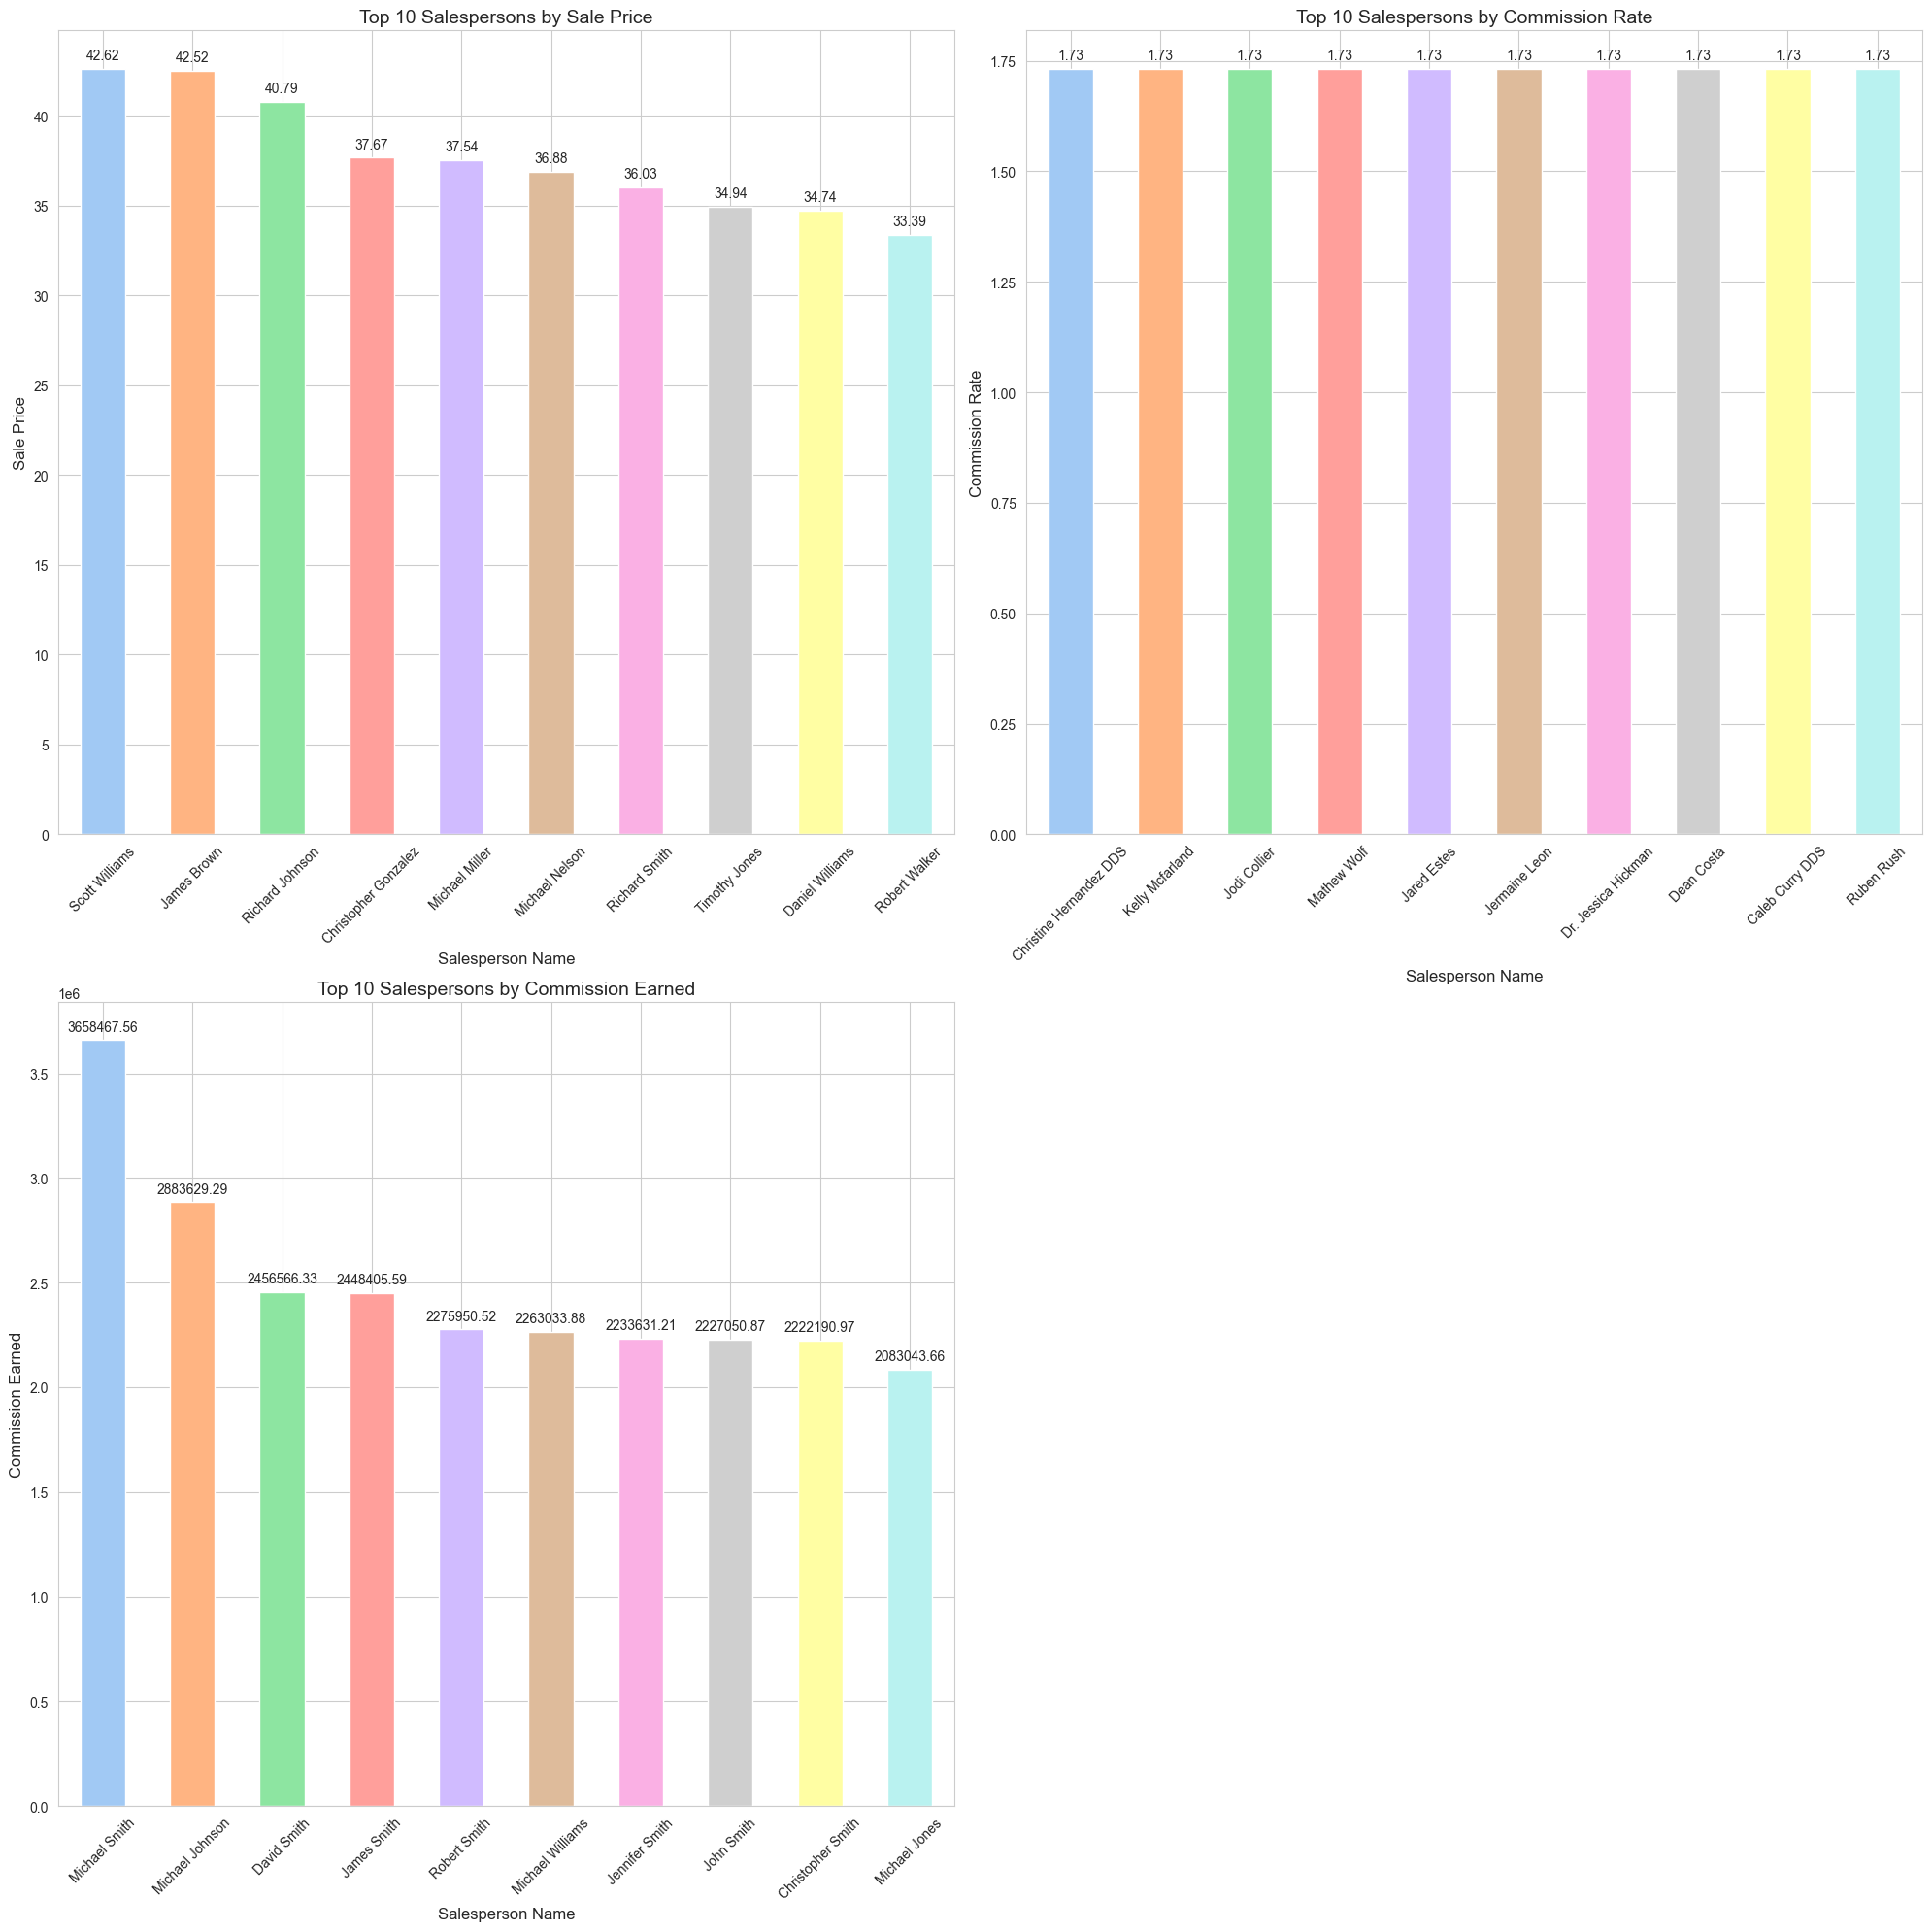

In [166]:

# Set the plot style
sns.set_style("whitegrid")

# Create subplots (2 rows, 2 columns)
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

# Flatten the axes array for easy indexing
ax = ax.flatten()

# Define the columns for plotting
columns = ["Sale Price", "Commission Rate", "Commission Earned"]

# Loop through each column and create a bar plot for the top 10 salespersons in that metric
for i, column in enumerate(columns):
    if column != "Commission Rate":
        # For sum aggregations
        top_salespersons = df.groupby("Salesperson")[column].sum().nlargest(10)
    else:
        # For mean aggregation
        top_salespersons = df.groupby("Salesperson")[column].mean().nlargest(10)
    
    # Plot the data
    top_salespersons.plot(kind='bar', color=sns.color_palette("pastel"), ax=ax[i])
    
    # Adding annotations on each bar
    for p in ax[i].patches:
        ax[i].annotate(f"{p.get_height():.2f}",
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), 
                       textcoords='offset points', fontsize=10)
    
    # Setting titles and labels
    ax[i].set_title(f"Top 10 Salespersons by {column}", fontsize=14)
    ax[i].set_xlabel("Salesperson Name", fontsize=12)
    ax[i].set_ylabel(column, fontsize=12)
    ax[i].grid(True)
    ax[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots if there are fewer than 4 columns
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# 🚗 Car Sales Performance Analysis

## 📊 Overview
This analysis focuses on the top-performing salespeople at a car dealership over the past year, based on three key metrics:
- Total Sale Price
- Average Commission Rate
- Total Commission Earned

The objective is to understand who the top performers are, identify any trends, and suggest strategies to optimize sales performance.

---

## 🔍 Observations & Analysis

### 1. Top Salespersons by Total Sale Price
   - Key Players: *Michael Smith*, *Michael Johnson*, and *David Smith* lead in total sales revenue, indicating their significant impact on dealership revenue.
   - Insights: These individuals may specialize in high-value vehicles or serve a larger customer base. Their sales techniques could be a valuable asset for training purposes.

### 2. Top Salespersons by Average Commission Rate
   - Key Players: *Christine Hernandez DDS* and *Kelly Mcfarland* stand out with the highest commission rates.
   - Insights: These salespeople may focus on specialized or premium vehicles, yielding higher commissions on fewer, select sales. Their sales may involve more luxury or niche models, which can justify higher commission rates.

### 3. Top Salespersons by Total Commission Earned
   - Key Players: *Michael Smith* and *Michael Johnson* also dominate in total commission earned, which correlates with their high total sales.
   - Insights: This suggests a combination of high sales volume and moderate-to-high commission rates. They appear to be driving both revenue and personal earnings effectively.

---

## 💡 Key Suggestions

1. Leverage High Performers’ Sales Techniques:
   - Document and share the sales strategies used by top performers, like *Michael Smith* and *Michael Johnson*, with the broader team. This could be a part of regular training sessions to improve overall sales performance.

2. Optimize Commission Structures:
   - Assess the commission structure for those who excel in commission rates but not necessarily in total sales. Consider aligning the commission structure to incentivize both high-value and high-quantity sales, thus maximizing dealership profitability.

3. Tailor Incentive Programs:
   - Develop separate incentive tracks: one focused on sales volume (for top revenue earners) and another on commission rates (for niche sales specialists). This can motivate salespeople to optimize for both metrics, fostering a balanced approach.

---

## 🧩 Conclusion

The data reveals distinct sales strategies among the top performers. High sales revenue individuals drive dealership revenue, while others focus on high-margin sales. By adjusting sales strategies and tailoring incentives, the dealership can optimize sales across the team, enhancing both sales volume and profitability.



### largest 4 people monthly sale for 2022 and 2023

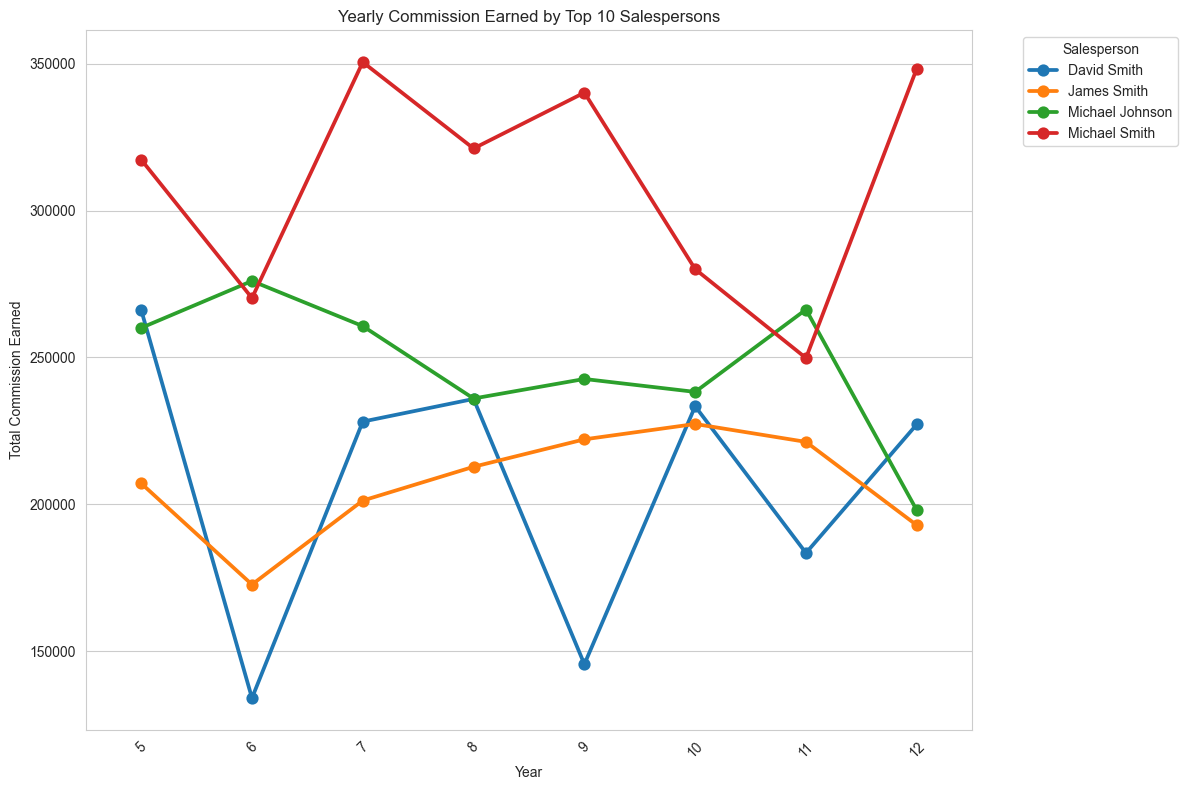

In [167]:


df_2022=df[df["Year"]==2022]

# Group by Salesperson and Car Year, then aggregate Commission Earned
salesperson_yearly_commission = df_2022.groupby(["Salesperson", "Month"])["Commission Earned"].sum().reset_index()

# Identify the top 10 salespersons by total Commission Earned across all years
top_salespersons = salesperson_yearly_commission.groupby("Salesperson")["Commission Earned"].sum().nlargest(4).index

# Filter the DataFrame for only these top 10 salespersons
filtered_data = salesperson_yearly_commission[salesperson_yearly_commission["Salesperson"].isin(top_salespersons)]

# Plot the data using a point plot
plt.figure(figsize=(12, 8))
sns.pointplot(data=filtered_data, x="Month", y="Commission Earned", hue="Salesperson", palette="tab10", markers='o')

# Customize plot
plt.title("Yearly Commission Earned by Top 10 Salespersons")
plt.xlabel("Year")
plt.ylabel("Total Commission Earned")
plt.xticks(rotation=45)
plt.legend(title="Salesperson", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

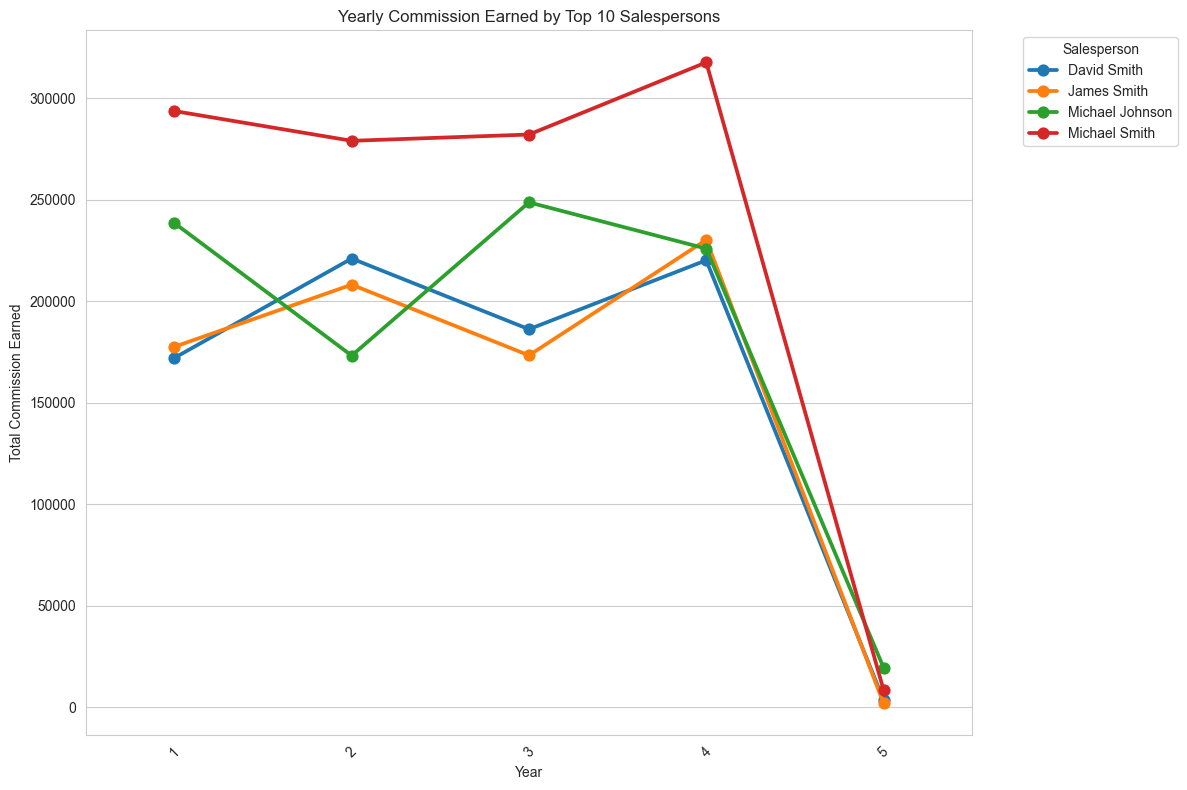

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

df_2023=df[df["Year"]==2023]

# Group by Salesperson and Car Year, then aggregate Commission Earned
salesperson_yearly_commission = df_2023.groupby(["Salesperson", "Month"])["Commission Earned"].sum().reset_index()

# Identify the top 10 salespersons by total Commission Earned across all years
top_salespersons = salesperson_yearly_commission.groupby("Salesperson")["Commission Earned"].sum().nlargest(4).index

# Filter the DataFrame for only these top 10 salespersons
filtered_data = salesperson_yearly_commission[salesperson_yearly_commission["Salesperson"].isin(top_salespersons)]

# Plot the data using a point plot
plt.figure(figsize=(12, 8))
sns.pointplot(data=filtered_data, x="Month", y="Commission Earned", hue="Salesperson", palette="tab10", markers='o')

# Customize plot
plt.title("Yearly Commission Earned by Top 10 Salespersons")
plt.xlabel("Year")
plt.ylabel("Total Commission Earned")
plt.xticks(rotation=45)
plt.legend(title="Salesperson", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### Custemer Analysis

In [169]:
df["Customer Name"].nunique()

518251

In [170]:
df["Year"].nunique()

2

**since the unique values are numerous we shoud use a bar plot(to see the most frequent buyers) and histogram to see the distribution**

## A  bivariate analysis of, which customer has more car sale price for our top 10 buyers

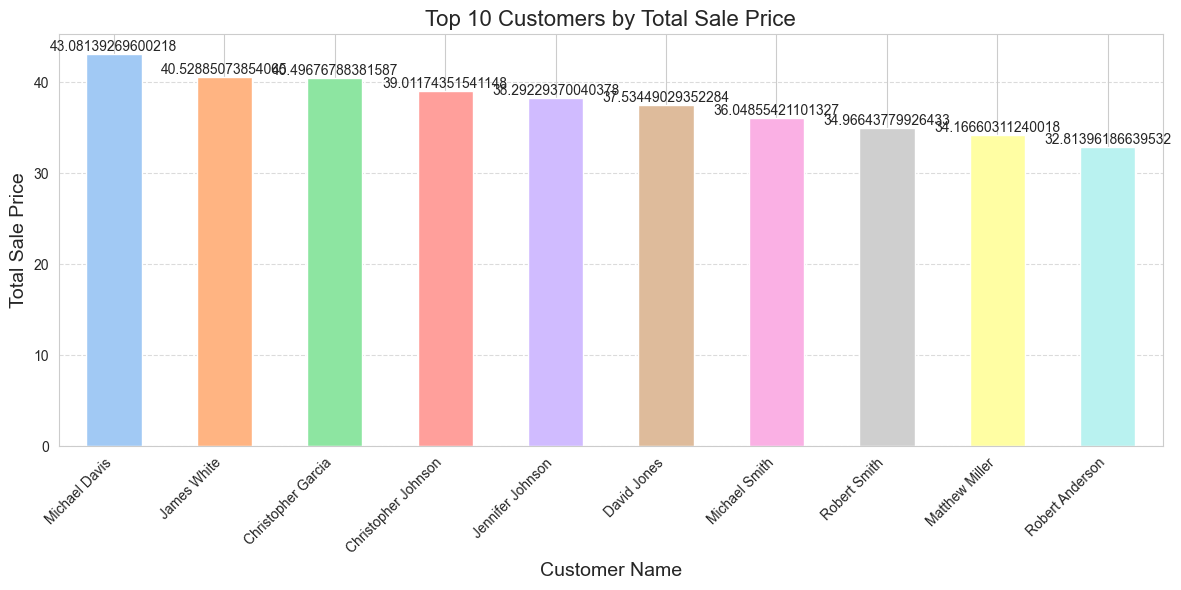

In [171]:
sns.set_style("whitegrid")

# Group by 'Customer Name' and calculate total 'Sale Price'
total_sales = df.groupby("Customer Name")["Sale Price"].sum().sort_values(ascending=False).head(10)

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Create a bar plot
ax = total_sales.plot(kind='bar', color=sns.color_palette("pastel"))

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Top 10 Customers by Total Sale Price', fontsize=16)
plt.xlabel('Customer Name', fontsize=14)
plt.ylabel('Total Sale Price', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [193]:
df.head()

,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Day,Month,Year,year_month,Date
Date,,,,,,,,,,,,,
2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,0.732934,1.193238,5172.40,15,3,2023,2023_3,2023-03-15
2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,0.288244,0.503888,3818.63,29,4,2023,2023_4,2023-04-29
2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,1.032887,-0.270052,3866.20,4,9,2022,2022_9,2022-09-04
2022-06-12,Ashley Brown,Tyler Lawson,Honda,F-150,2013,0.986114,1.482143,5910.67,12,6,2022,2022_6,2022-06-12
2022-06-20,Norma Watkins,Michael Bond,Ford,Altima,2015,1.404992,-0.982401,3311.38,20,6,2022,2022_6,2022-06-20


**Customer Name**
1. Michael Smith        35440398
2. Michael Johnson      26416587
3. David Smith          23946782
4. Michael Williams     23945527
5. James Smith          23753487
6. Jennifer Smith       23061017
7. Robert Smith         23032875
8. Christopher Smith    22156689
9. Michael Jones        22132422
10. John Smith           22012402

In [213]:
OHE = OneHotEncoder(sparse_output=False)

# Fit and transform the selected column
encoded = OHE.fit_transform(df[['Car Model']])

# Get the transformed feature names
feature_names = OHE.get_feature_names_out(['Car Model'])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded, columns=feature_names)

# Reset the index of both DataFrames to avoid index issues
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the encoded columns with the original DataFrame (excluding the original categorical column)
df_final = pd.concat([df.drop(['Car Model'], axis=1), encoded_df], axis=1)


df_final.head()

,Salesperson,Customer Name,Car Make,Car Year,Sale Price,Commission Rate,Commission Earned,Day,Month,Year,year_month,Date,Car Model_Altima,Car Model_Civic,Car Model_Corolla,Car Model_F-150,Car Model_Silverado
0,Roberto Rose,Richard Pierce,Nissan,2016,0.732934,1.193238,5172.40,15,3,2023,2023_3,2023-03-15,0.0,0.0,0.0,1.0,0.0
1,Ashley Ramos,Sandra Moore,Ford,2016,0.288244,0.503888,3818.63,29,4,2023,2023_4,2023-04-29,0.0,1.0,0.0,0.0,0.0
2,Patrick Harris,Johnny Scott,Ford,2013,1.032887,-0.270052,3866.20,4,9,2022,2022_9,2022-09-04,1.0,0.0,0.0,0.0,0.0
3,Ashley Brown,Tyler Lawson,Honda,2013,0.986114,1.482143,5910.67,12,6,2022,2022_6,2022-06-12,0.0,0.0,0.0,1.0,0.0
4,Norma Watkins,Michael Bond,Ford,2015,1.404992,-0.982401,3311.38,20,6,2022,2022_6,2022-06-20,1.0,0.0,0.0,0.0,0.0


In [212]:
OHE = OneHotEncoder(sparse_output=False)

# Fit and transform the selected column
encoded = OHE.fit_transform(df[['Car Make']])

# Get the transformed feature names
feature_names = OHE.get_feature_names_out(['Car Make'])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded, columns=feature_names)

# Reset the index of both DataFrames to avoid index issues
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the encoded columns with the original DataFrame (excluding the original categorical column)
df_final = pd.concat([df.drop(['Car Make'], axis=1), encoded_df], axis=1)


df_final.head()

,Salesperson,Customer Name,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Day,Month,Year,year_month,Date,Car Make_Chevrolet,Car Make_Ford,Car Make_Honda,Car Make_Nissan,Car Make_Toyota
0,Roberto Rose,Richard Pierce,F-150,2016,0.732934,1.193238,5172.40,15,3,2023,2023_3,2023-03-15,0.0,0.0,0.0,1.0,0.0
1,Ashley Ramos,Sandra Moore,Civic,2016,0.288244,0.503888,3818.63,29,4,2023,2023_4,2023-04-29,0.0,1.0,0.0,0.0,0.0
2,Patrick Harris,Johnny Scott,Altima,2013,1.032887,-0.270052,3866.20,4,9,2022,2022_9,2022-09-04,0.0,1.0,0.0,0.0,0.0
3,Ashley Brown,Tyler Lawson,F-150,2013,0.986114,1.482143,5910.67,12,6,2022,2022_6,2022-06-12,0.0,0.0,1.0,0.0,0.0
4,Norma Watkins,Michael Bond,Altima,2015,1.404992,-0.982401,3311.38,20,6,2022,2022_6,2022-06-20,0.0,1.0,0.0,0.0,0.0


In [214]:
Labelencoder = LabelEncoder()

df['Customer Name'] = Labelencoder.fit_transform(df['Customer Name'])
df['Salesperson'] = Labelencoder.fit_transform(df['Salesperson'])

df.head()


,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Day,Month,Year,year_month,Date
0,303535,299000,Nissan,F-150,2016,0.732934,1.193238,5172.40,15,3,2023,2023_3,2023-03-15
1,29547,312474,Ford,Civic,2016,0.288244,0.503888,3818.63,29,4,2023,2023_4,2023-04-29
2,285140,176286,Ford,Altima,2013,1.032887,-0.270052,3866.20,4,9,2022,2022_9,2022-09-04
3,28832,356918,Honda,F-150,2013,0.986114,1.482143,5910.67,12,6,2022,2022_6,2022-06-12
4,280730,247173,Ford,Altima,2015,1.404992,-0.982401,3311.38,20,6,2022,2022_6,2022-06-20


In [208]:
df.head()

,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Day,Month,Year,year_month,Date
0,Roberto Rose,Richard Pierce,Nissan,F-150,2016,0.732934,1.193238,5172.40,15,3,2023,2023_3,2023-03-15
1,Ashley Ramos,Sandra Moore,Ford,Civic,2016,0.288244,0.503888,3818.63,29,4,2023,2023_4,2023-04-29
2,Patrick Harris,Johnny Scott,Ford,Altima,2013,1.032887,-0.270052,3866.20,4,9,2022,2022_9,2022-09-04
3,Ashley Brown,Tyler Lawson,Honda,F-150,2013,0.986114,1.482143,5910.67,12,6,2022,2022_6,2022-06-12
4,Norma Watkins,Michael Bond,Ford,Altima,2015,1.404992,-0.982401,3311.38,20,6,2022,2022_6,2022-06-20


In [172]:
df['Car Year'].value_counts()

Car Year
2013    192970
2017    192663
2020    192657
2015    192595
2018    192549
2014    192491
2010    192462
2012    192454
2016    192267
2019    192225
2011    191800
2021    191636
2022    191231
Name: count, dtype: int64

In [173]:
df['Sale Price'].value_counts()

Sale Price
-1.316154    101
 0.890576     97
 0.041387     97
 0.685035     95
 1.308848     95
            ... 
 0.803873     36
-0.771509     35
 0.067979     35
 0.421980     34
-0.630671     34
Name: count, Length: 40001, dtype: int64

In [215]:
numerical_columns = df.select_dtypes(exclude='object')
categorical_columns = df.select_dtypes(include='object').columns.tolist()

if 'Commission Earned' in df.columns:
    categorical_columns.append('Commission Earned')

In [216]:
corr_matrix=numerical_columns.corr('pearson')


<Axes: >

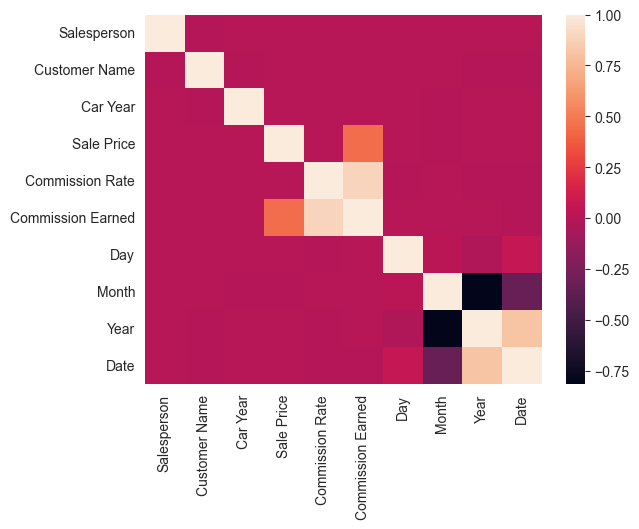

In [217]:
sns.heatmap(corr_matrix)


In [177]:
df['Sale Price'].value_counts()

Sale Price
-1.316154    101
 0.890576     97
 0.041387     97
 0.685035     95
 1.308848     95
            ... 
 0.803873     36
-0.771509     35
 0.067979     35
 0.421980     34
-0.630671     34
Name: count, Length: 40001, dtype: int64

In [178]:
df['Car Model'].unique()

array(['Altima', 'F-150', 'Civic', 'Silverado', 'Corolla'], dtype=object)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500000 entries, 2022-08-01 to 2023-03-24
Data columns (total 13 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Salesperson        object        
 1   Customer Name      object        
 2   Car Make           object        
 3   Car Model          object        
 4   Car Year           int64         
 5   Sale Price         float64       
 6   Commission Rate    float64       
 7   Commission Earned  float64       
 8   Day                int32         
 9   Month              int32         
 10  Year               int32         
 11  year_month         object        
 12  Date               datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(5)
memory usage: 238.4+ MB
